In [86]:
import numpy as np
import re
import matplotlib.pyplot as plt
import pandas as pd

plt.rc("figure", figsize=(12, 6))
np.set_printoptions(precision=3)
pd.options.display.max_rows = 10

url = "https://raw.githubusercontent.com/adylw/Tests/refs/heads/main/2025_T1_Data.csv"

data = pd.DataFrame(pd.read_csv(url))
data = pd.read_csv(url, skiprows=[0,2,5])
data

,Day,SD0,Date
0,NaN,NaN,NaN
1,0.0,3.232,01/01/2023
2,NaN,NaN,NaN
3,1.0,3.196,02/01/2023
4,2.0,NaN,03/01/2023
...,...,...,...
1992,1856.0,18.389,31/01/2028
1993,1856.0,18.389,31/01/2028
1994,1856.0,18.389,31/01/2028
1995,1856.0,18.389,31/01/2028


2. Remove rows that only contain NA values

In [87]:
data.dropna(how='all', inplace=True)
data

,Day,SD0,Date
1,0.0,3.232,01/01/2023
3,1.0,3.196,02/01/2023
4,2.0,NaN,03/01/2023
5,3.0,3.232,04/01/2023
6,4.0,NaN,05/01/2023
...,...,...,...
1992,1856.0,18.389,31/01/2028
1993,1856.0,18.389,31/01/2028
1994,1856.0,18.389,31/01/2028
1995,1856.0,18.389,31/01/2028


3. Forward fill all NA values.

In [88]:
data = data.fillna(method="ffill")
data 

C:\Users\221209344\AppData\Local\Temp\ipykernel_9148\1762756091.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method="ffill")


,Day,SD0,Date
1,0.0,3.232,01/01/2023
3,1.0,3.196,02/01/2023
4,2.0,3.196,03/01/2023
5,3.0,3.232,04/01/2023
6,4.0,3.232,05/01/2023
...,...,...,...
1992,1856.0,18.389,31/01/2028
1993,1856.0,18.389,31/01/2028
1994,1856.0,18.389,31/01/2028
1995,1856.0,18.389,31/01/2028


4. Remove any duplicated rows.

In [89]:
data = data.drop_duplicates()
data

,Day,SD0,Date
1,0.0,3.232,01/01/2023
3,1.0,3.196,02/01/2023
4,2.0,3.196,03/01/2023
5,3.0,3.232,04/01/2023
6,4.0,3.232,05/01/2023
...,...,...,...
1854,1852.0,18.366,27/01/2028
1855,1853.0,18.372,28/01/2028
1856,1854.0,18.378,29/01/2028
1857,1855.0,18.383,30/01/2028


5. Count the number of entries in the Date column, then count the number of unique entries in the
Date column.

In [90]:
numOfEntriesDateColumn = data['Date'].count()
numOfUniqueEntriesDateColumn = data['Date'].nunique()
print(f"Number of entries in Date column: {numOfEntriesDateColumn}")
print(f"Number of unique entries in Date column: {numOfUniqueEntriesDateColumn}")

Number of entries in Date column: 1857
Number of unique entries in Date column: 1857


6. Use the total number of days to calculate the number of years the dataset spans. Use floating point 
precision and assume 1 year equals 365 days.

In [91]:
totalNumOfDays = data['Date'].count()
numOfYearsDataSpans = totalNumOfDays / 365
print(f"Total number of years: {numOfYearsDataSpans:.2f}")

Total number of years: 5.09


7. Add a new column which has the day and month from each row in the Date column removed, call 
this column “Year”. 

In [92]:
data['Year'] = data['Date'].str.extract(r'(\d{4})')
data

C:\Users\221209344\AppData\Local\Temp\ipykernel_9148\2993100008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data['Date'].str.extract(r'(\d{4})')


,Day,SD0,Date,Year
1,0.0,3.232,01/01/2023,2023
3,1.0,3.196,02/01/2023,2023
4,2.0,3.196,03/01/2023,2023
5,3.0,3.232,04/01/2023,2023
6,4.0,3.232,05/01/2023,2023
...,...,...,...,...
1854,1852.0,18.366,27/01/2028,2028
1855,1853.0,18.372,28/01/2028,2028
1856,1854.0,18.378,29/01/2028,2028
1857,1855.0,18.383,30/01/2028,2028


8. Use the Year column to find the number of years the dataset spans. Why does this value not equal 
the value in Q6?

In [93]:
numOfYears = data['Year'].nunique()
print(f"Total number of years: {numOfYears}")

Total number of years: 6


The reason why Q8 is not the same as Q6 is because Q6 uses number of days divide how many are in a year even though it doesn't contain duplicates but since its using days it didnt complete the whole 365 of the last day. Thats why is 5.9 where else number of years counts all years it took

9. Change all column headings to lower case. 

In [94]:
data.columns = data.columns.str.lower()
data

,day,sd0,date,year
1,0.0,3.232,01/01/2023,2023
3,1.0,3.196,02/01/2023,2023
4,2.0,3.196,03/01/2023,2023
5,3.0,3.232,04/01/2023,2023
6,4.0,3.232,05/01/2023,2023
...,...,...,...,...
1854,1852.0,18.366,27/01/2028,2028
1855,1853.0,18.372,28/01/2028,2028
1856,1854.0,18.378,29/01/2028,2028
1857,1855.0,18.383,30/01/2028,2028


10. Find the percentage change of the sd0 column, save as a new column called pct and then find the 
mean in this column.

In [95]:
data['pct'] = data['sd0'].pct_change() * 100
mean_pct = data['pct'].mean()
print(f"Mean percentage change: {mean_pct:.2%}")
data

Mean percentage change: 9.38%


C:\Users\221209344\AppData\Local\Temp\ipykernel_9148\2365707102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['pct'] = data['sd0'].pct_change() * 100


,day,sd0,date,year,pct
1,0.0,3.232,01/01/2023,2023,NaN
3,1.0,3.196,02/01/2023,2023,-1.114
4,2.0,3.196,03/01/2023,2023,0.000
5,3.0,3.232,04/01/2023,2023,1.126
6,4.0,3.232,05/01/2023,2023,0.000
...,...,...,...,...,...
1854,1852.0,18.366,27/01/2028,2028,0.027
1855,1853.0,18.372,28/01/2028,2028,0.033
1856,1854.0,18.378,29/01/2028,2028,0.033
1857,1855.0,18.383,30/01/2028,2028,0.027


11. Find the difference between the max and min values in the sd0 column, then divide that difference
by the number of days. What does this value tell us and what are the units of this value?

In [96]:
difference = data['sd0'].max() - data['sd0'].min()
numOfDays = data['day'].nunique()
rate = difference / numOfDays
print(f"Rate of change: {rate:.2f} days")

Rate of change: 0.01 days


12. Sort the Dataframe by descending day number. 

In [97]:
data.sort_values(by='day', ascending=False, inplace=True)
data

C:\Users\221209344\AppData\Local\Temp\ipykernel_9148\3269517244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values(by='day', ascending=False, inplace=True)


,day,sd0,date,year,pct
1858,1856.0,18.389,31/01/2028,2028,0.033
1857,1855.0,18.383,30/01/2028,2028,0.027
1856,1854.0,18.378,29/01/2028,2028,0.033
1855,1853.0,18.372,28/01/2028,2028,0.033
1854,1852.0,18.366,27/01/2028,2028,0.027
...,...,...,...,...,...
6,4.0,3.232,05/01/2023,2023,0.000
5,3.0,3.232,04/01/2023,2023,1.126
4,2.0,3.196,03/01/2023,2023,0.000
3,1.0,3.196,02/01/2023,2023,-1.114


13. Plot the sd0 and pct columns on two separate side-by-side graphs in one figure. The sd0 data must 
be on the left graph.
14. Label the axes and title each graph.

Text(0, 0.5, 'SD0')

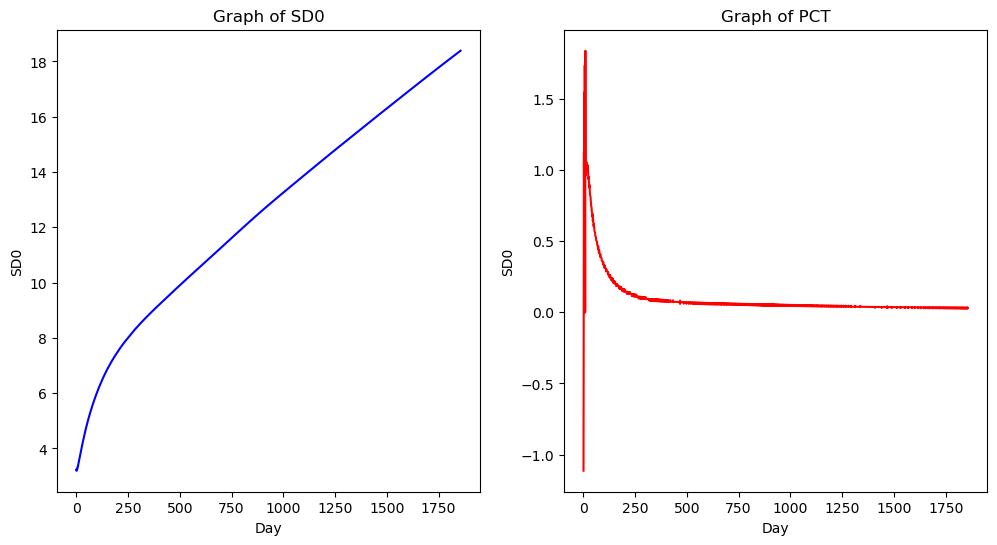

In [99]:
figure = plt.figure()
sd0Fig = figure.add_subplot(1, 2, 1)
pctFig = figure.add_subplot(1, 2, 2)

sd0Fig.set_title("Graph of SD0")
sd0Fig.plot(data['day'], data['sd0'], color='blue')
sd0Fig.set_xlabel("Day")
sd0Fig.set_ylabel("SD0")

pctFig.set_title("Graph of PCT")
pctFig.plot(data['day'], data['pct'], color='red')
pctFig.set_xlabel("Day")
pctFig.set_ylabel("SD0")

15. Save the figure (in code) as Test1.jpg with a dpi of 600, paste the figure in your report if you are 
not using a notebook.

In [100]:
figure.savefig('Test1.jpg', dpi=600)

16. Write the Dataframe to a file named “Test1.csv”. 

In [101]:
data.to_csv('Test1.csv', index=False)